In [1]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt   
import json

c:\Users\engel\miniconda3\envs\azureStudy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
data = pd.read_csv(path+"/data.csv")

In [3]:
data = data.drop([' Net Income Flag'], axis = 1)
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(["Bankrupt?"], axis=1), data["Bankrupt?"], test_size=0.2, random_state=42)
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
3759,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,0.022512
1782,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,0.026670
5013,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,0.041556
5412,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,0.018173
3066,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,0.023328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.542729,0.601123,0.583597,0.598236,0.598229,0.999014,0.797499,0.809394,0.303621,0.781659,...,0,0.836504,0.016145,0.624788,0.598231,0.842331,0.276206,0.026800,0.565198,0.073707
5191,0.550870,0.620148,0.610793,0.610422,0.610228,0.999101,0.797553,0.809468,0.303533,0.781738,...,0,0.843680,0.001074,0.624009,0.610419,0.843046,0.277142,0.026820,0.565293,0.049579
5226,0.507288,0.562200,0.556989,0.605529,0.605371,0.999033,0.797433,0.809354,0.303466,0.781615,...,0,0.813096,0.001194,0.623880,0.605529,0.841427,0.279716,0.026945,0.565800,0.029459
5390,0.581339,0.644407,0.633706,0.617247,0.617247,0.999129,0.797665,0.809550,0.303672,0.781826,...,0,0.855711,0.000806,0.623856,0.617243,0.843619,0.276696,0.026800,0.565200,0.058283


In [5]:
#PCA
explained = []

for i in range(3,95):
    pca = PCA(n_components=i)
    principal_components = pca.fit_transform(X_train.to_numpy())
    explained.append(pca.explained_variance_ratio_)

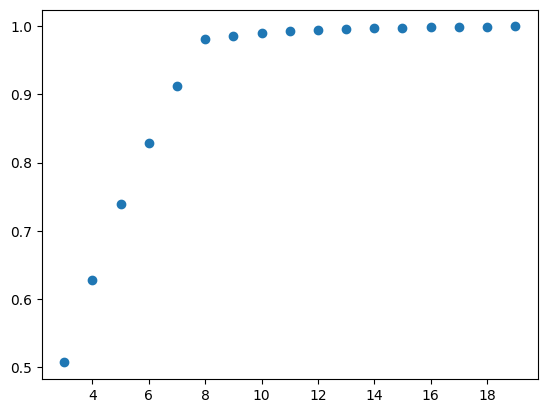

In [6]:
total = []
for i in explained:
    total.append(sum(i))
plt.scatter(list(range(3,20)), total[:17])

In [7]:
from sklearn.decomposition import PCA
import numpy as np

# Assume X_train and X_test are already defined

# Step 1: Fit PCA on the training set
pca = PCA(n_components=9)  # Set desired number of components
X_train_pca = pca.fit_transform(X_train)

# Step 2: Get the transformation matrix (principal components)
transformation_matrix = pca.components_  # Shape: (n_components, n_features)

# Step 3: Apply the transformation matrix to X_test
X_test_pca = np.dot(X_test - pca.mean_, transformation_matrix.T)

# Now X_test_pca is in the same PCA space as X_train_pca


In [8]:
# Export the pca object
np.save("pca_mean.npy", pca.mean_)
np.save("pca_components.npy", pca.components_)

In [9]:
# Fit an XGBoost model on the PCA-transformed training data
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import  classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_pca, y_train)
y_pred = xgb.predict(X_test_pca)
y_pred


c:\Users\engel\miniconda3\envs\azureStudy\lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


array([0, 0, 0, ..., 0, 0, 0])

In [10]:
print("Input size:", xgb.n_features_in_) 
print("number of classes:", len(xgb.classes_)) 

Input size: 9
number of classes: 2


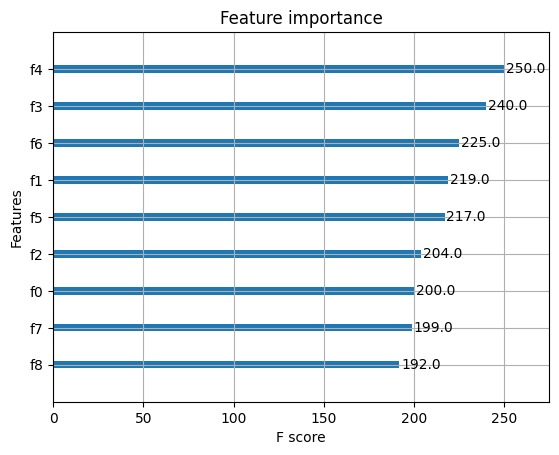

In [11]:
plot_importance(xgb)
plt.show()

In [12]:

print(xgb.get_booster().get_dump()[0])

0:[f8<-139783824] yes=1,no=2,missing=2
	1:[f2<-2.07217754e+09] yes=3,no=4,missing=4
		3:leaf=-0.0610342212
		4:leaf=0.468269318
	2:[f3<-294629312] yes=5,no=6,missing=6
		5:[f6<-25323522] yes=7,no=8,missing=8
			7:[f4<2.26770022e+09] yes=11,no=12,missing=12
				11:[f4<-1.90940557e+09] yes=19,no=20,missing=20
					19:[f2<3.24959002e+09] yes=31,no=32,missing=32
						31:leaf=-0.304425895
						32:leaf=-0.182085097
					20:[f4<1.12897344e+09] yes=33,no=34,missing=34
						33:leaf=-0.0842564106
						34:leaf=-0.239755452
				12:[f3<-358177888] yes=21,no=22,missing=22
					21:[f1<-2.94895488e+09] yes=35,no=36,missing=36
						35:leaf=-0.0288050231
						36:leaf=-0.339031935
					22:[f4<2.5403095e+09] yes=37,no=38,missing=38
						37:leaf=0.118488982
						38:leaf=-0.185191557
			8:[f0<1.59421658e+09] yes=13,no=14,missing=14
				13:[f4<-2.82845491e+09] yes=23,no=24,missing=24
					23:[f5<-992468992] yes=39,no=40,missing=40
						39:leaf=-0.168955982
						40:leaf=0.232909918
					24:[f7<-6018

EVALUATING. 

Esta parte debería también ir incluida en score.py

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.25      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.61      0.51      0.51      1364
weighted avg       0.94      0.96      0.94      1364



In [14]:
import pickle

file = open('model.pkl', 'wb')
pickle.dump(xgb, file)
file.close()